In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['axes.grid'] = True

## 1. SIR Model Equations

In [4]:
def sir_equa(y, t, N, beta, gamma):
    """
    Our SIR Model with ODE's
    
    Params:
    * y -> our initial values for S,I and R
    * N -> Total population 
    * beta -> contact rate
    * gamma -> recovery rate
    """
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt

## 2. Solving the ODE's

In [5]:
N = 1000 # Total Population
I0 = 1 # Initial Number of Infected people in the population
R0 = 0 # Initial Number of Recovered people in the population
S0 = N - I0 - R0 # Initial Number of Susceptible People in the population
beta = 0.2 # Contact/transmission rate
gamma = 0.1 # Recovery rate

t = np.linspace(start=0, stop=100,num=100) # Create the time period over which we want to solve the ODE's (time period over 100 days)

In [6]:
results = odeint(sir_equa, [S0,I0,R0], t, args=(N, beta, gamma))

In [7]:
results.shape

(100, 3)

In [8]:
S_from_ODE, I_from_ODE, R_from_ODE = results.T

In [9]:
S_from_ODE.shape

(100,)

In [10]:
I_from_ODE.shape

(100,)

In [11]:
R_from_ODE.shape

(100,)

### 2.1 Results from Solved ODE's

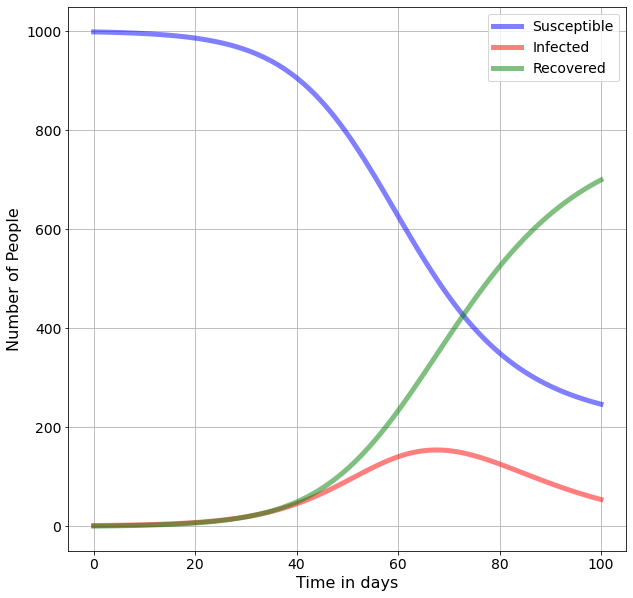

In [12]:
fig = plt.figure(facecolor='w',figsize=(10,10))
ax = fig.add_subplot(111, facecolor='w', axisbelow=True)
ax.plot(t, S_from_ODE, 'b', alpha=0.5, lw=5, label='Susceptible')
ax.plot(t, I_from_ODE, 'r', alpha=0.5, lw=5, label='Infected')
ax.plot(t, R_from_ODE, 'g', alpha=0.5, lw=5, label='Recovered')
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of People')
plt.grid(True)
plt.legend()
plt.show()

## 3. Fitting the ODE's with Simulated Data (By estimating the parameters beta and gamma)

### 3.1 Generating Data for Fitting

In [13]:
# Simulated Number of Infected People
x_data = np.linspace(start=0, stop=100, num=100) # Time (days)
# For our simulated infected people lets use the data after we solved the ODE's with the inital parameter values and add an extra 2 people infected for every timestep
y_data = I_from_ODE + 2

In [14]:
x_data.shape

(100,)

In [15]:
y_data.shape

(100,)

### 3.2 Defining our Initial Values

In [16]:
I0 = float(int(y_data[0])) #Initial Number of Infected People
N = 1000 # Total Population
R0 = 0 # Initial Number of Recovered people in the population
S0 = N - I0 - R0 # Initial Number of Susceptible People in the population

### 3.3 Fitting the ODE's with our Simulated Data

For this we need a wrapper around our ODE solver function

In [17]:
def fit_sir_equa(x, beta, gamma):
    return odeint(sir_equa, [S0,I0,R0], t, args=(N, beta, gamma))[:,1] # Indexing with 1 since we want to fit the infected curve

In [18]:
popt, pcov = optimize.curve_fit(fit_sir_equa, x_data, y_data) # We fit the infected curve and get back our parameters (beta,gamma) and a covariance matrix 

In [19]:
beta_after_fitting,gamma_after_fitting = popt
print("Beta's Value After Fitting : %s" %str(beta_after_fitting))
print("Gamma's Value After Fitting : %s" %str(gamma_after_fitting))

Beta's Value After Fitting : 0.1685139336785741
Gamma's Value After Fitting : 0.08676731706843274


### 3.4 Using our Estimated Parameters from Curve Fitting (Non-linear least Squares) to Solve our ODE's

In [20]:
results = odeint(sir_equa, [S0,I0,R0], t, args=(N, popt[0], popt[1]))

In [21]:
S_after_fitting, I_after_fitting, R_after_fitting = results.T

In [22]:
S_after_fitting

array([997.        , 996.46955997, 995.89412739, 995.26997668,
       994.59308993, 993.85913689, 993.06345396, 992.20102256,
       991.26644669, 990.25393011, 989.15725291, 987.96974805,
       986.68427787, 985.29321108, 983.78840047, 982.16116184,
       980.40225472, 978.50186542, 976.44959332, 974.23444089,
       971.84480896, 969.26849748, 966.49271368, 963.50408858,
       960.28870327, 956.83212653, 953.11946516, 949.13542891,
       944.86441126, 940.29058784, 935.39803384, 930.17086143,
       924.59337875, 918.65026946, 912.32679559, 905.60901893,
       898.48404497, 890.94028074, 882.96770956, 874.55817371,
       865.70566104, 856.40659175, 846.66009048, 836.46824705,
       825.83634174, 814.77304242, 803.29054825, 791.40468489,
       779.13493247, 766.50438931, 753.5396565 , 740.27065584,
       726.73036793, 712.9544966 , 698.98107763, 684.85002549,
       670.60263854, 656.2810749 , 641.92781112, 627.58510159,
       613.29445222, 599.09612233, 585.02866847, 571.12

In [23]:
I_after_fitting

array([  3.        ,   3.25642332,   3.53443178,   3.83578305,
         4.16236733,   4.51621546,   4.89950712,   5.31457912,
         5.76393368,   6.25024645,   6.77637433,   7.34536277,
         7.9604524 ,   8.6250847 ,   9.34290649,  10.11777282,
        10.953748  ,  11.85510419,  12.8263171 ,  13.87205841,
        14.99718387,  16.20671702,  17.50582726,  18.89980175,
        20.39401026,  21.99386222,  23.70475499,  25.5320127 ,
        27.4808149 ,  29.55611436,  31.76254343,  34.10430938,
        36.58507759,  39.20784502,  41.97480191,  44.88718732,
        47.94513541,  51.14752096,  54.49180209,  57.97386846,
        61.58789816,  65.32622748,  69.17924393,  73.13530188,
        77.18067575,  81.29954814,  85.47404629,  89.68432515,
        93.9087059 ,  98.12386509, 102.30508412, 106.42654049,
       110.46165171, 114.383462  , 118.16504724, 121.77994709,
       125.20260064, 128.40877215, 131.37595852, 134.08376142,
       136.51421445, 138.65205572, 140.48493722, 142.00

In [24]:
R_after_fitting

array([0.00000000e+00, 2.74016707e-01, 5.71440829e-01, 8.94240272e-01,
       1.24454274e+00, 1.62464765e+00, 2.03703892e+00, 2.48439832e+00,
       2.96961963e+00, 3.49582344e+00, 4.06637276e+00, 4.68488918e+00,
       5.35526973e+00, 6.08170421e+00, 6.86869304e+00, 7.72106533e+00,
       8.64399728e+00, 9.64303039e+00, 1.07240896e+01, 1.18935007e+01,
       1.31580072e+01, 1.45247855e+01, 1.60014591e+01, 1.75961097e+01,
       1.93172865e+01, 2.11740113e+01, 2.31757799e+01, 2.53325584e+01,
       2.76547738e+01, 3.01532978e+01, 3.28394227e+01, 3.57248292e+01,
       3.88215437e+01, 4.21418855e+01, 4.56984025e+01, 4.95037937e+01,
       5.35708196e+01, 5.79121983e+01, 6.25404883e+01, 6.74679578e+01,
       7.27064408e+01, 7.82671808e+01, 8.41606656e+01, 9.03964511e+01,
       9.69829825e+01, 1.03927409e+02, 1.11235405e+02, 1.18910990e+02,
       1.26956362e+02, 1.35371746e+02, 1.44155259e+02, 1.53302804e+02,
       1.62807980e+02, 1.72662041e+02, 1.82853875e+02, 1.93370027e+02,
      

### 3.5 Comparing our ODE results (assumed beta and gamma) to Fitted Results (estimated beta and gamma)

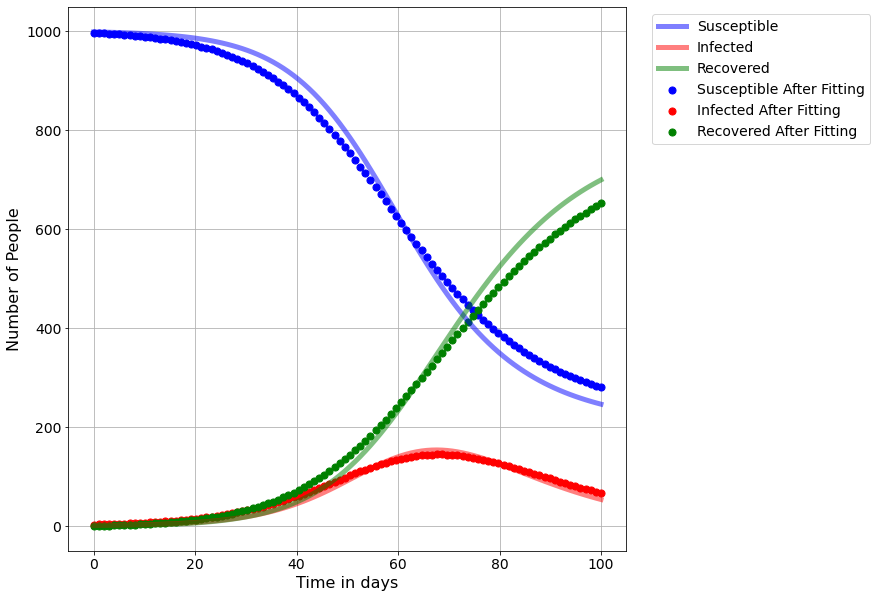

In [25]:
fig = plt.figure(facecolor='w',figsize=(10,10))
ax = fig.add_subplot(111, facecolor='w', axisbelow=True)
ax.plot(t, S_from_ODE, 'b', alpha=0.5, lw=5, label='Susceptible')
ax.scatter(t,S_after_fitting,c='b',marker="o",s=50,label="Susceptible After Fitting")
ax.plot(t, I_from_ODE, 'r', alpha=0.5, lw=5, label='Infected')
ax.scatter(t,I_after_fitting,c='r',marker="o",s=50,label="Infected After Fitting")
ax.plot(t, R_from_ODE, 'g', alpha=0.5, lw=5, label='Recovered')
ax.scatter(t,R_after_fitting,c='g',marker="o",s=50,label="Recovered After Fitting")
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of People')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

We observe that since the Number of Infected people was used to estimate the parameters $\beta$ and $\gamma$ the Curve for Infected after fitting is almost perfectly alligned with the Infected curve we got from solving the ODE's using an assumed value for $\beta$ and $\gamma$, while for the other fitted curves their is a slight misallignment